In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# read dataset into pandas dataframe
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [2]:
# split dataset into features and labels
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

n = len(X.columns)
m = len(X)
print("n features :", n, ", m samples :", m)

n features : 12 , m samples : 299


In [3]:
# identify continuous features
lst1 = list()
for col in X:
    if len(X[col].unique()) > 2:
        lst1.append(col)

print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [4]:
# scale continuous features with standard scaler
scaler = StandardScaler()
X[lst1] = scaler.fit_transform(X[lst1])


In [5]:
# Apply principal component analysis to reduce feature dimension to 2
components = 2
pca = PCA(n_components=components)
pc_x = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc_x, columns = [f"pc{i}" for i in range(1, components+1)])

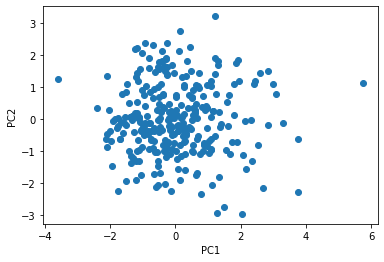

In [6]:
# scatter plot the two principal components
plt.scatter(pc_df["pc1"], pc_df["pc2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


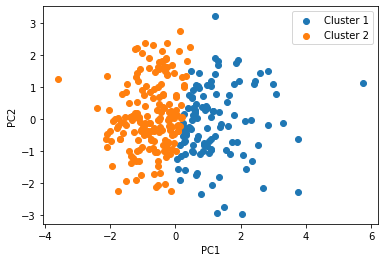

Accuracy : 0.7725752508361204


In [7]:
# Apply KMeans clustering to principal component features

n_clusters = 2  # Two clusters for 2 different labels

km = KMeans(n_clusters=2, init="random")

y_km = km.fit_predict(pc_df)

label = [f"Cluster {i}" for i in range(1, n_clusters+1)]

for i in range(n_clusters):
    plt.scatter(pc_df["pc1"].iloc[y_km == i], pc_df["pc2"].iloc[y_km == i], label=label[i])
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

score = accuracy_score(Y, y_km)

print("Accuracy :", score if score >= 0.5 else 1-score)

